In [4]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_lima')
backend.properties()

ibmqfactory.load_account:WARNING:2021-11-15 08:17:19,171: Credentials are already in use. The existing account in the session will be replaced.


In [5]:
from qiskit.providers.aer.noise import thermal_relaxation_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import pauli_error

from qiskit.visualization import plot_histogram
import qiskit.providers.aer.noise as noise
#import matplotlib.pyplot as plt

def make_noise_therm(p_m,p_g):

    T1 = 142370 # in nano second, basically 54 micro second
    T2 = 209610 # in nano second, basically 44 micro second

    # Gate operation time in nano second
    time_h = 71.11
    time_x = 71.11
    time_id = 71.11
    time_measure = 4977.778

    # probability of bit flip error after each gate

    error_measure = thermal_relaxation_error(T1,T2,time_measure)
    error_m = pauli_error([('X',p_m),('I',1-p_m)])
    
    error_gate1 = thermal_relaxation_error(T1,T2,time_x)
    error_bit1 = depolarizing_error(p_g,1)
    error_bit2 = error_bit1.tensor(error_bit1)

    noise_model = noise.NoiseModel()

    noise_model.add_all_qubit_quantum_error(error_measure, "measure")
    noise_model.add_all_qubit_quantum_error(error_m, "measure")
    noise_model.add_all_qubit_quantum_error(error_gate1, "relaxation single gate")
    noise_model.add_all_qubit_quantum_error(error_bit1, ["h","x","id"])
    
    return noise_model

In [6]:
from qiskit.tools.monitor import backend_monitor
import matplotlib.pyplot as plt
from qiskit.tools.visualization import circuit_drawer
from qiskit import *
from qiskit.visualization import plot_histogram
from random import randrange, seed, sample
from sys import argv, exit
import random  
y_list00=[]
y_list11=[]
    #data = int(input('ENTER LENGTH OF BIT STREAM (example 5 For 10110):'))
for z in range(20):
    data=100
    ##########################################################################
    h=0
    #h=int(input())
    def bit_stream(p):
        key1 = ""
        for i in range(p):
            temp = str(random.randint(h,h))
            key1 += temp
        return(key1)
    
    bitstream= bit_stream(data)
    digits = [int(x) for x in str(bitstream)]
    #print(digits)
    ##########################################################################
    #print('List of Bit Stream to transfer over Quantum Channel')
    #print(digits)
    #print('\n')
    #n = len(digits)
    
    ##########################################################################
    bob_bits00=[]
    bob_bits11=[]
    from random import choice
    m=0
    n=100
    for i in range(n):
        m=m+10
        #print("No of identity Gate:",m)
        if digits[i] == 0:
            q = QuantumRegister(2, 'q')
            c = ClassicalRegister(2, 'c')
            qc = QuantumCircuit(q, c)
            #qc.x(0)
            #qc.x(1)
            qc.h(0) 
            qc.barrier()
            qc.cx(q[0], q[1])
            qc.barrier()
            for j in range(m):
                qc.id(1)
                qc.barrier()
            qc.x(0) 
            #qc.barrier()
            qc.x(1) 
            qc.barrier()
            qc.measure(q[0], c[0])
            qc.measure(q[1], c[1])

            # Perform a noise simulation
            backend = Aer.get_backend('qasm_simulator')
            counts = backend.run(qc,Aer.get_backend('qasm_simulator'),initial_layout=[0],shots=8192,noise_model=make_noise_therm(0.0312,0.0002182)).result().get_counts()
            #counts = result.get_counts(qc)
            %matplotlib inline
            #print(qc)
            #qc.draw(output='mpl')
            #plt.show()
            #print(counts)
            #plot_histogram(counts)
            
    #######################################################################################
            for key, value in counts.items():
                if key == '00':
                    bob_bits00.append(value/8192)
                    #print(key, '::', value/8192)
            
            for key, value in counts.items():
                if key == '11':
                    bob_bits11.append(value/8192)
                    #print(key, '::', value/8192)
    #######################################################################################
    
            #itemMaxValue = max(counts.items(), key=lambda x : x[1])
            #print(itemMaxValue)
            # Iterate over all the items in dictionary to find keys with max value
            #for key, value in counts.items():
                #if value == itemMaxValue[1]:
                    
                    #bob_bits.append(value/8192)
    y_list00.append(bob_bits00)
    y_list11.append(bob_bits11)
    #print("")
print("For |00> :",y_list00)
print("For |11> :",y_list11)

For |00> : [[0.46826171875, 0.4666748046875, 0.4735107421875, 0.4649658203125, 0.4639892578125, 0.465087890625, 0.4783935546875, 0.4737548828125, 0.472412109375, 0.4678955078125, 0.464599609375, 0.4698486328125, 0.470458984375, 0.468994140625, 0.4625244140625, 0.4727783203125, 0.4573974609375, 0.466064453125, 0.46142578125, 0.4522705078125, 0.457275390625, 0.4603271484375, 0.4632568359375, 0.45654296875, 0.461669921875, 0.46728515625, 0.457763671875, 0.458740234375, 0.454833984375, 0.4635009765625, 0.454345703125, 0.4581298828125, 0.451904296875, 0.4625244140625, 0.4493408203125, 0.46240234375, 0.4466552734375, 0.4500732421875, 0.4525146484375, 0.45361328125, 0.453125, 0.458984375, 0.452392578125, 0.4622802734375, 0.443359375, 0.4488525390625, 0.4583740234375, 0.4462890625, 0.453857421875, 0.4495849609375, 0.4515380859375, 0.466064453125, 0.4404296875, 0.4564208984375, 0.45703125, 0.453857421875, 0.44873046875, 0.45361328125, 0.46044921875, 0.4376220703125, 0.4493408203125, 0.447265625

20 Times Average

In [7]:
from statistics import mean
a=y_list00
print(*map(mean, zip(*a)))

from statistics import mean
b=y_list11
print(*map(mean, zip(*b)))

0.468853759765625 0.4709228515625 0.470050048828125 0.469281005859375 0.46864013671875 0.465350341796875 0.4686767578125 0.46649169921875 0.466802978515625 0.467706298828125 0.46834716796875 0.46724853515625 0.46837158203125 0.46507568359375 0.465069580078125 0.465447998046875 0.462200927734375 0.46451416015625 0.461639404296875 0.462109375 0.4606689453125 0.460223388671875 0.461639404296875 0.4606689453125 0.461328125 0.4604736328125 0.45850830078125 0.4599609375 0.458489990234375 0.457696533203125 0.457818603515625 0.45838623046875 0.455059814453125 0.455712890625 0.456695556640625 0.454742431640625 0.457440185546875 0.453985595703125 0.455328369140625 0.45482177734375 0.452972412109375 0.454644775390625 0.453619384765625 0.45345458984375 0.451416015625 0.451025390625 0.45386962890625 0.44849853515625 0.45079345703125 0.450604248046875 0.450115966796875 0.44931640625 0.44683837890625 0.451177978515625 0.44664306640625 0.446087646484375 0.446392822265625 0.447735595703125 0.4489196777

Map Plotting

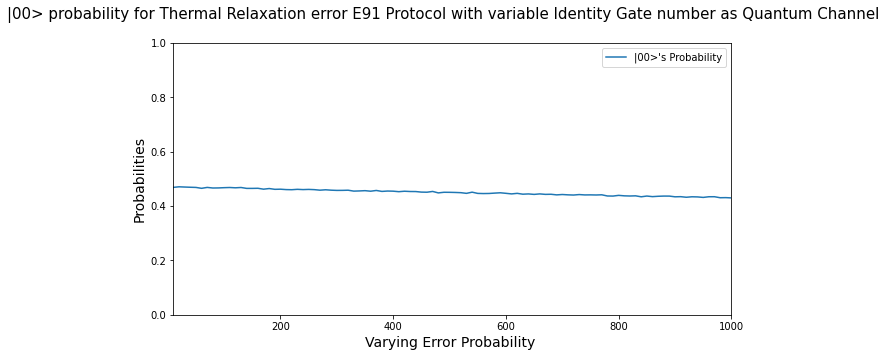

<Figure size 576x360 with 0 Axes>

In [8]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|00> probability for Thermal Relaxation error E91 Protocol with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000)
ax.set_ylim(0,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y1=[0.468853759765625, 0.4709228515625, 0.470050048828125, 0.469281005859375, 0.46864013671875, 0.465350341796875, 0.4686767578125, 0.46649169921875, 0.466802978515625, 0.467706298828125, 0.46834716796875, 0.46724853515625, 0.46837158203125, 0.46507568359375, 0.465069580078125, 0.465447998046875, 0.462200927734375, 0.46451416015625, 0.461639404296875, 0.462109375, 0.4606689453125, 0.460223388671875, 0.461639404296875, 0.4606689453125, 0.461328125, 0.4604736328125, 0.45850830078125, 0.4599609375, 0.458489990234375, 0.457696533203125, 0.457818603515625, 0.45838623046875, 0.455059814453125, 0.455712890625, 0.456695556640625, 0.454742431640625, 0.457440185546875, 0.453985595703125, 0.455328369140625, 0.45482177734375, 0.452972412109375, 0.454644775390625, 0.453619384765625, 0.45345458984375, 0.451416015625, 0.451025390625, 0.45386962890625, 0.44849853515625, 0.45079345703125, 0.450604248046875, 0.450115966796875, 0.44931640625, 0.44683837890625, 0.451177978515625, 0.44664306640625, 0.446087646484375, 0.446392822265625, 0.447735595703125, 0.448919677734375, 0.44693603515625, 0.444793701171875, 0.446826171875, 0.44375, 0.4447265625, 0.4429931640625, 0.4447998046875, 0.44307861328125, 0.44346923828125, 0.441217041015625, 0.44256591796875, 0.441339111328125, 0.440625, 0.442352294921875, 0.441009521484375, 0.44124755859375, 0.440802001953125, 0.44151611328125, 0.437152099609375, 0.436834716796875, 0.43941650390625, 0.437689208984375, 0.43707275390625, 0.437713623046875, 0.4341796875, 0.4369140625, 0.434759521484375, 0.4360595703125, 0.43677978515625, 0.43673095703125, 0.43411865234375, 0.43463134765625, 0.432489013671875, 0.4342041015625, 0.433697509765625, 0.43189697265625, 0.434332275390625, 0.434429931640625, 0.4307373046875, 0.431097412109375, 0.430059814453125]
x1=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

#plotting the line 2 points
ax.plot(x1, y1, label = "|00>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()

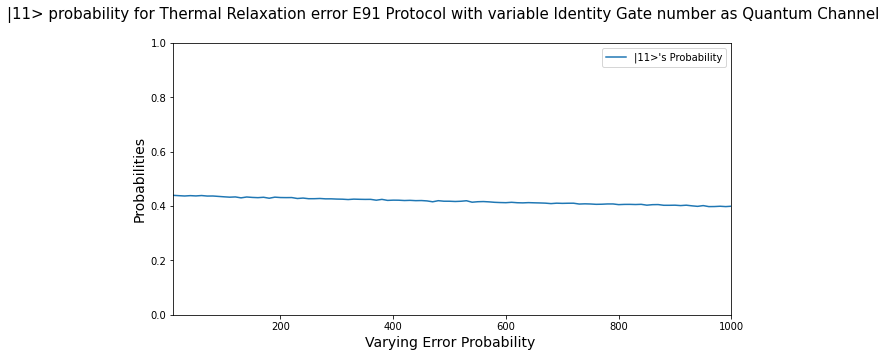

<Figure size 576x360 with 0 Axes>

In [9]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|11> probability for Thermal Relaxation error E91 Protocol with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Error Probability ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000)
ax.set_ylim(0,1)
fig = plt.figure(figsize=(8,5))
# line 2 points
y1=[0.43948974609375, 0.438262939453125, 0.437109375, 0.43839111328125, 0.437353515625, 0.438763427734375, 0.4368896484375, 0.437078857421875, 0.435577392578125, 0.434088134765625, 0.432757568359375, 0.433673095703125, 0.430218505859375, 0.433428955078125, 0.4318603515625, 0.4309814453125, 0.432421875, 0.428863525390625, 0.4328369140625, 0.43140869140625, 0.431146240234375, 0.43134765625, 0.42786865234375, 0.429498291015625, 0.427093505859375, 0.4271728515625, 0.427947998046875, 0.426593017578125, 0.426654052734375, 0.425750732421875, 0.425323486328125, 0.424029541015625, 0.425555419921875, 0.424951171875, 0.424578857421875, 0.4247314453125, 0.42161865234375, 0.42467041015625, 0.420916748046875, 0.42181396484375, 0.42158203125, 0.42044677734375, 0.421087646484375, 0.41995849609375, 0.42034912109375, 0.419012451171875, 0.415789794921875, 0.419830322265625, 0.41788330078125, 0.41783447265625, 0.4169189453125, 0.41773681640625, 0.41961669921875, 0.41424560546875, 0.416021728515625, 0.4166259765625, 0.415509033203125, 0.4138427734375, 0.41300048828125, 0.4125, 0.41387939453125, 0.41234130859375, 0.411822509765625, 0.4126953125, 0.4120361328125, 0.411529541015625, 0.410791015625, 0.409130859375, 0.410662841796875, 0.410015869140625, 0.41044921875, 0.410540771484375, 0.40750732421875, 0.408258056640625, 0.40770263671875, 0.4064697265625, 0.4068359375, 0.407818603515625, 0.40782470703125, 0.405328369140625, 0.406201171875, 0.406298828125, 0.40572509765625, 0.40645751953125, 0.403314208984375, 0.40517578125, 0.40552978515625, 0.402923583984375, 0.40289306640625, 0.403265380859375, 0.401849365234375, 0.403271484375, 0.4009033203125, 0.398974609375, 0.401751708984375, 0.3980712890625, 0.3983154296875, 0.39937744140625, 0.398095703125, 0.39947509765625]
x1=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]

#plotting the line 2 points
ax.plot(x1, y1, label = "|11>'s Probability")
#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()

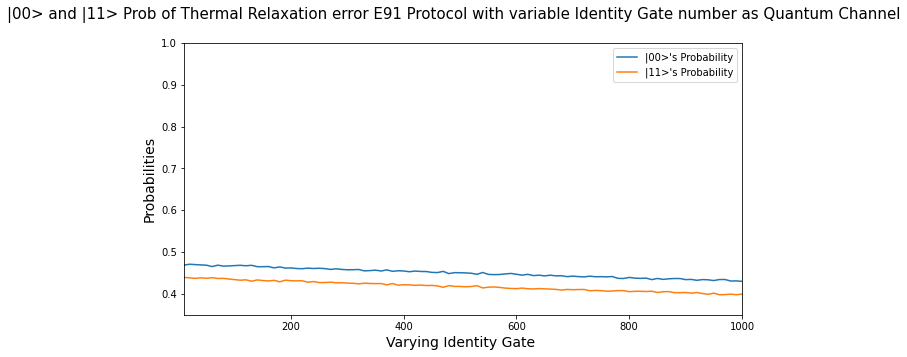

<Figure size 576x360 with 0 Axes>

In [11]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('|00> and |11> Prob of Thermal Relaxation error E91 Protocol with variable Identity Gate number as Quantum Channel',fontsize=15)
# naming the x axis
plt.xlabel('Varying Identity Gate ',fontsize=14)
# naming the y axis
plt.ylabel('Probabilities',fontsize=14)
# giving a title to my graph
# Set axis ranges; by default this will put major ticks every 25.
#ax.set_xlim(0, 300)
#ax.set_ylim(0, 1)
ax.set_xlim(10, 1000)
ax.set_ylim(0.35,1)
fig = plt.figure(figsize=(8,5))


# line 1 points

x1 = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]
y1 = [0.468853759765625, 0.4709228515625, 0.470050048828125, 0.469281005859375, 0.46864013671875, 0.465350341796875, 0.4686767578125, 0.46649169921875, 0.466802978515625, 0.467706298828125, 0.46834716796875, 0.46724853515625, 0.46837158203125, 0.46507568359375, 0.465069580078125, 0.465447998046875, 0.462200927734375, 0.46451416015625, 0.461639404296875, 0.462109375, 0.4606689453125, 0.460223388671875, 0.461639404296875, 0.4606689453125, 0.461328125, 0.4604736328125, 0.45850830078125, 0.4599609375, 0.458489990234375, 0.457696533203125, 0.457818603515625, 0.45838623046875, 0.455059814453125, 0.455712890625, 0.456695556640625, 0.454742431640625, 0.457440185546875, 0.453985595703125, 0.455328369140625, 0.45482177734375, 0.452972412109375, 0.454644775390625, 0.453619384765625, 0.45345458984375, 0.451416015625, 0.451025390625, 0.45386962890625, 0.44849853515625, 0.45079345703125, 0.450604248046875, 0.450115966796875, 0.44931640625, 0.44683837890625, 0.451177978515625, 0.44664306640625, 0.446087646484375, 0.446392822265625, 0.447735595703125, 0.448919677734375, 0.44693603515625, 0.444793701171875, 0.446826171875, 0.44375, 0.4447265625, 0.4429931640625, 0.4447998046875, 0.44307861328125, 0.44346923828125, 0.441217041015625, 0.44256591796875, 0.441339111328125, 0.440625, 0.442352294921875, 0.441009521484375, 0.44124755859375, 0.440802001953125, 0.44151611328125, 0.437152099609375, 0.436834716796875, 0.43941650390625, 0.437689208984375, 0.43707275390625, 0.437713623046875, 0.4341796875, 0.4369140625, 0.434759521484375, 0.4360595703125, 0.43677978515625, 0.43673095703125, 0.43411865234375, 0.43463134765625, 0.432489013671875, 0.4342041015625, 0.433697509765625, 0.43189697265625, 0.434332275390625, 0.434429931640625, 0.4307373046875, 0.431097412109375, 0.430059814453125]
# plotting the line 2 points
ax.plot(x1, y1, label = "|00>'s Probability")

# line 2 points


x2 = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000]
y2 = [0.43948974609375, 0.438262939453125, 0.437109375, 0.43839111328125, 0.437353515625, 0.438763427734375, 0.4368896484375, 0.437078857421875, 0.435577392578125, 0.434088134765625, 0.432757568359375, 0.433673095703125, 0.430218505859375, 0.433428955078125, 0.4318603515625, 0.4309814453125, 0.432421875, 0.428863525390625, 0.4328369140625, 0.43140869140625, 0.431146240234375, 0.43134765625, 0.42786865234375, 0.429498291015625, 0.427093505859375, 0.4271728515625, 0.427947998046875, 0.426593017578125, 0.426654052734375, 0.425750732421875, 0.425323486328125, 0.424029541015625, 0.425555419921875, 0.424951171875, 0.424578857421875, 0.4247314453125, 0.42161865234375, 0.42467041015625, 0.420916748046875, 0.42181396484375, 0.42158203125, 0.42044677734375, 0.421087646484375, 0.41995849609375, 0.42034912109375, 0.419012451171875, 0.415789794921875, 0.419830322265625, 0.41788330078125, 0.41783447265625, 0.4169189453125, 0.41773681640625, 0.41961669921875, 0.41424560546875, 0.416021728515625, 0.4166259765625, 0.415509033203125, 0.4138427734375, 0.41300048828125, 0.4125, 0.41387939453125, 0.41234130859375, 0.411822509765625, 0.4126953125, 0.4120361328125, 0.411529541015625, 0.410791015625, 0.409130859375, 0.410662841796875, 0.410015869140625, 0.41044921875, 0.410540771484375, 0.40750732421875, 0.408258056640625, 0.40770263671875, 0.4064697265625, 0.4068359375, 0.407818603515625, 0.40782470703125, 0.405328369140625, 0.406201171875, 0.406298828125, 0.40572509765625, 0.40645751953125, 0.403314208984375, 0.40517578125, 0.40552978515625, 0.402923583984375, 0.40289306640625, 0.403265380859375, 0.401849365234375, 0.403271484375, 0.4009033203125, 0.398974609375, 0.401751708984375, 0.3980712890625, 0.3983154296875, 0.39937744140625, 0.398095703125, 0.39947509765625]
# plotting the line 2 points 
ax.plot(x2, y2, label = "|11>'s Probability")

#ax.axes.xaxis.set_ticks([])
# show a legend on the plot
ax.legend()